In [31]:
import torch
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
import os
import itertools
sys.path.append('../')

from detection import detect_bottle, get_6_points, get_6_points_manually
from unwrap import detect_and_unwrap
from ultralytics import YOLO
# from unwrap_labels import LabelUnwrapper

1) Unwrap manually

In [11]:
# Double-click to mark a point
# Add clockwise starting from the top left to the bottom left (from A to F)
# Press 'q' at the end
folder = 'bottle'
imgs = []
for i in range(len(os.listdir(folder))):
    imgcenter, maskcenter = detect_bottle(folder + f'/img_{i}.jpg', return_mask=True)
    print("Press 1 if detect 6 points automatically (for cylindrical bottles)\nPress 2 if manually")
    choice = int(input())
    if choice == 1:
        points = get_6_points(imgcenter, maskcenter)
    elif choice == 2:
        points = get_6_points_manually(imgcenter)
    print(points)
    imgs.append(detect_and_unwrap(imgcenter, points))


image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottles\4\img_0.jpg: 640x480 1 bottle, 1 dining table, 1592.8ms
Speed: 0.0ms preprocess, 1592.8ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 480)
Press 1 if detect 6 points automatically (for cylindrical bottles)
Press 2 if manually
2
44 150
222 98
430 158
412 1112
230 1210
66 1126
[[44, 150], [222, 98], [430, 158], [412, 1112], [230, 1210], [66, 1126]]

image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottles\4\img_1.jpg: 640x480 1 bottle, 1 dining table, 2001.9ms
Speed: 6.0ms preprocess, 2001.9ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 480)
Press 1 if detect 6 points automatically (for cylindrical bottles)
Press 2 if manually
2
46 124
242 68
456 138
436 1120
260 1240
68 1150
[[46, 124], [242, 68], [456, 138], [436, 1120], [260, 1240], [68, 1150]]

image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottles\4\img_2.jpg: 640x480 1 bottle, 1 dining table, 1956.6ms


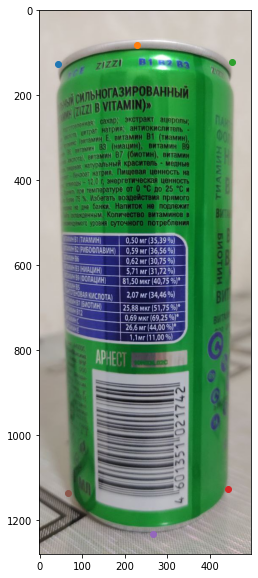

In [16]:
plt.rcParams['figure.figsize'] = (5.0, 10.0)
plt.imshow(imgcenter)#results[0].masks.data[0])
for dot in points:
    plt.scatter(*dot)

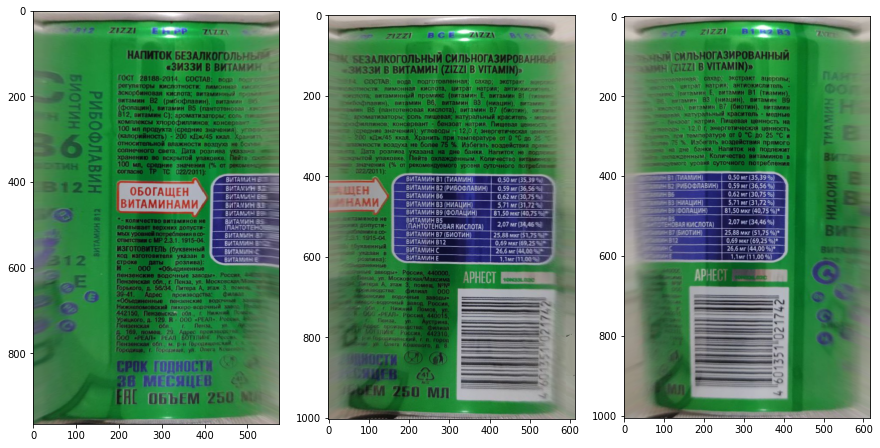

In [17]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].imshow(imgs[i])
plt.show()

2) Unwrap autmatically

In [68]:
folder = 'bottle'
imgs = []
for i in range(len(os.listdir(folder))):
    imgcenter, maskcenter = detect_bottle(folder + f'/img_{i}.jpg', return_mask=True)
    print("Press 1 if detect 6 points automatically (for cylindrical bottles)\nPress 2 if manually")
    choice = int(input())
    if choice == 1:
        points = get_6_points(imgcenter, maskcenter)
    elif choice == 2:
        points = get_6_points_manually(imgcenter)
    print(points)
    imgs.append(detect_and_unwrap(imgcenter, points))


image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottle\img_0.jpg: 640x480 1 bottle, 1 dining table, 1890.0ms
Speed: 3.0ms preprocess, 1890.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 480)
Press 1 if detect 6 points automatically (for cylindrical bottles)
Press 2 if manually
1
((49, 149), (221, 111), (431, 169), (403, 1130), (220, 1212), (71, 1144))

image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottle\img_1.jpg: 640x480 1 bottle, 1 dining table, 1994.4ms
Speed: 3.0ms preprocess, 1994.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Press 1 if detect 6 points automatically (for cylindrical bottles)
Press 2 if manually
1
((50, 131), (248, 71), (447, 143), (429, 1144), (239, 1234), (76, 1168))

image 1/1 C:\Users\troma\Documents\2 term\Intro to CV\Project\bottle\img_2.jpg: 640x480 1 bottle, 1 dining table, 1689.7ms
Speed: 0.0ms preprocess, 1689.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Press 

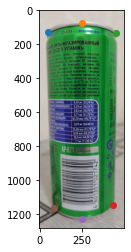

In [9]:
plt.imshow(imgcenter)#results[0].masks.data[0])
for dot in points:
    plt.scatter(*dot)

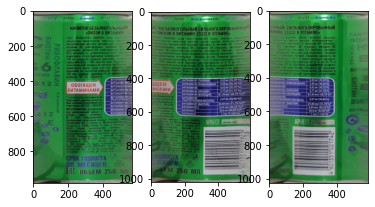

In [10]:
fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].imshow(imgs[i])
plt.show()

# Stiching

In [23]:
import itertools
import random

In [18]:
def keypoints_matching_flann(dscrs1, dscrs2):
    index_params = dict(
        algorithm=1,  # FLANN_INDEX_KDTREE
        trees=5
    )
    search_params = dict(checks=20)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    flann_matches = flann.knnMatch(dscrs1, dscrs2, k=2)
    good_matches = []
    for neighbour_1, neighbour_2 in flann_matches:
        if neighbour_1.distance < 0.75 * neighbour_2.distance:
            good_matches.append(neighbour_1)
    return good_matches

In [21]:
img_1, img_2, img_3 = imgs
imgs_raw = [img_1, img_2, img_3]

n = img_1.shape[1]
imgs_raw = [img[:, int(0.1 * n):int(0.9 * n), :] for img in imgs_raw]

imgs_raw[1] = img_2[:, int(0.2 * n):int(0.8 * n), :]

In [41]:
os.makedirs("data_label")

In [42]:
ipaths = []
for images in imgs_raw:
    ipath = int(random.random() * 1000000)
    path = f'data_label/{ipath}.jpg'
    cv2.imwrite(f'data_label/{ipath}.jpg', images)
    ipaths.append(path)
    
ipaths

['data_label/664046.jpg', 'data_label/555777.jpg', 'data_label/574984.jpg']

In [43]:
sift = cv2.SIFT_create()

images_info = {}
for ipath in ipaths:
    to_append = {}
    to_append['img'] = cv2.imread(ipath)
    to_append['img_gray'] = cv2.cvtColor(to_append['img'], cv2.COLOR_BGR2GRAY)
    
    kpts, desc = sift.detectAndCompute(to_append['img_gray'], None)
    to_append['keypoints'] = kpts
    to_append['descriptors'] = desc
    
    images_info[ipath] = to_append
    
images_info.keys()

dict_keys(['data_label/664046.jpg', 'data_label/555777.jpg', 'data_label/574984.jpg'])

In [44]:
matches_images = dict()
for ipath_0, ipath_1 in itertools.permutations(ipaths, 2):
    matches_pair = keypoints_matching_flann(
        images_info[ipath_0]['descriptors'],
        images_info[ipath_1]['descriptors']
    )
    matches_images[(ipath_0, ipath_1)] = matches_pair

In [45]:
def get_homographies(images_info, matches_images, algorithm="sift", threshold=.5, confidence=0.995):
    
    homographies = dict()
    for (ipath_0, ipath_1), matches in matches_images.items():
        
        if algorithm == 'sift':
            # our stock algorithm
            src_pts = np.float32([images_info[ipath_0]['keypoints'][m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
            dst_pts = np.float32([images_info[ipath_1]['keypoints'][m.trainIdx].pt for m in matches]).reshape(-1, 1, 2) 
        if algorithm == "disk":
            # algorithm we will compare SIFT with
            src_pts = images_info[ipath_0]['keypoints'][matches[1][:, 0]].detach().cpu().numpy()
            dst_pts = images_info[ipath_1]['keypoints'][matches[1][:, 1]].detach().cpu().numpy()         
#####################################            
            
        M, mask = cv2.findHomography(
            src_pts,
            dst_pts,
            cv2.RANSAC,
            ransacReprojThreshold=threshold,
            maxIters=20000,
            confidence=confidence)
        
        homographies[ipath_0, ipath_1] = (M, mask.ravel().tolist())
        
    return homographies   
    
homographies = get_homographies(images_info, matches_images, algorithm="sift", threshold=.5, confidence=0.995)

In [46]:
# so we transform image
def change_perspective(img, M, plot = True):
    old_h = img.shape[0] # initial image height
    old_w = img.shape[1] # initial image width
    
    # future(after warping) corner coordinates
    new_left_bottom = dict() 
    new_right_top = dict() 
    
    old_box = np.array([[[0, 0], # old image corner coordinates
                        [0, old_h],
                        [old_w, old_h], 
                        [old_w, 0]]],    
                       dtype=float)
    
    
    old_alpha_mask = np.zeros(img.shape) # alpha mask is just mask full of 1 with the same shape as warped image
    old_alpha_mask[:,:,] = [1, 1, 1]  
    # get new warped image corner coordinates
    new_box = cv2.perspectiveTransform(old_box, M) 
    new_box = new_box.reshape(-1, 2).astype(int)
    
    new_x_min = (new_box[:, 0].min())
    new_y_min = (new_box[:, 1].min())
    new_x_max = (new_box[:, 0].max())
    new_y_max = (new_box[:, 1].max())
    
    new_dims = {'new_x_min':new_x_min,
                'new_y_min':new_y_min,
                'new_x_max':new_x_max,
                'new_y_max':new_y_max,
               }
    
    # get height and width for warped image
    new_h = new_y_max - new_y_min
    new_w = new_x_max - new_x_min
    
    # we apply transform and shift consecutively and get warped image in correct position 
    adjustment_transform = np.array([[1, 0, -new_x_min], 
                                     [0, 1, -new_y_min], 
                                     [0, 0, 1]], 
                                    dtype=float)
    
    new_img = cv2.warpPerspective(img,
                                    adjustment_transform@M, 
                                    (new_w, new_h)
                                 )
    
    new_alpha_mask = cv2.warpPerspective(old_alpha_mask,
                                    adjustment_transform@M, 
                                    (new_w, new_h)
                                 )
    # decided to use 0 to 1 range, so we scale colors
    new_img = (new_img / 255) 
    
    if plot:

        plt.imshow(new_img, vmin=0, vmax=1)
        plt.axis('off')
        plt.show()                                
    return new_box, new_img, new_dims, new_alpha_mask

In [47]:
def consequtive_stitching(ipaths, homographies):
    # We use the fact that images were taken consecutively.
    # So we iterate over them from center in both directions.
    
    n_imgs = len(ipaths)
    center_img_ind = (n_imgs - 1) // 2
    transformed_imgs = [] # output with transformed images

    # central image is our starting point, so we do not transform it al all
    ipath_center =  ipaths[center_img_ind]     
    img_center = images_info[ipath_center]['img']
    M_curr = np.eye(3,3) # no transformation
    new_box, new_img, new_dims, alpha_mask = change_perspective(img_center, M_curr, plot = False)
    
    # initialize panorama size by size of the central image
    max_x = img_center[:, 0].min() 
    min_x = img_center[:, 1].min() 
    max_y = img_center[:, 0].max() 
    min_y = img_center[:, 1].max()
    
    # add central image to output
    transformed_imgs.append({'box': new_box, 'img':new_img, 'new_dims':new_dims, 'alpha_mask': alpha_mask})
    
    for side_expansion in [
        {'start_index': center_img_ind, 'end_index': 0, 'direction': -1}, # left dir
        {'start_index': center_img_ind, 'end_index': n_imgs - 1,'direction': 1}]:# right dir
        
        # If we iterate from center to the right, we warp next image around its left neighbour.
        # If we iterate from center to the left, we warp next image around its  right neighbour.
        
        direction = side_expansion['direction']
        start_ind = side_expansion['start_index']
        end_ind = side_expansion['end_index']
        M_curr = np.eye(3,3)
        while (end_ind - start_ind)*(direction)>0:

            ipath_curr =  ipaths[start_ind]
            ipath_next =  ipaths[start_ind+direction]
            
            M_next, _ = homographies[ipath_next, ipath_curr]
            img_curr, img_next = images_info[ipath_curr]['img'], images_info[ipath_next]['img']
            # we apply transform consecutively, so next image is always warped over previous (which also can be warped)
            M_curr = M_curr@M_next 
            new_box, new_img, new_dims, alpha_mask  = change_perspective(img_next, M_curr, plot = True)
            
            # we iteratively renew panorama size, when more images are transformed 
            if new_dims['new_x_min'] < min_x:
                min_x = new_dims['new_x_min']
            if new_dims['new_y_min'] < min_y:
                min_y = new_dims['new_y_min']
                
            if new_dims['new_x_max'] > max_x:
                max_x = new_dims['new_x_max']
            if new_dims['new_y_max'] > max_y:
                max_y = new_dims['new_y_max']
            
            transformed_imgs.append({'box': new_box, 'img':new_img, 'new_dims':new_dims, 'alpha_mask': alpha_mask})

            start_ind += direction

    for img_next in transformed_imgs:
        # we correct images corner coordinates with respect to finalized panorama size
        
        new_dims = img_next['new_dims']
        new_img = img_next['img']
        alpha_mask = img_next['alpha_mask']
        
        
        new_dims['new_y_min'] = new_dims['new_y_min'] - min_y
        new_dims['new_y_max'] = new_dims['new_y_max'] - min_y
        
        new_dims['new_x_min'] = new_dims['new_x_min'] - min_x
        new_dims['new_x_max'] = new_dims['new_x_max'] - min_x
        
    return transformed_imgs, max_x, min_x, max_y, min_y   
        
def get_panorama(transformed_imgs, max_x, min_x, max_y, min_y):
    # we have warped images, their coordinates in panorama and masks to overlap them
    
    print('____________________constructing panorama____________________')    
    full_height = max_y - min_y 
    full_width = max_x - min_x
    final_panorama = np.zeros((full_height, full_width, 3), dtype=float) # blank   
    final_mask = np.zeros((full_height, full_width, 3), dtype=float) # blank mask
    
    for img_next in reversed(transformed_imgs):
        
        box = img_next['box']
        new_img = img_next['img']
        new_dims = img_next['new_dims']
        alpha_mask = img_next['alpha_mask']
        
        fragment = final_panorama[new_dims['new_y_min']:new_dims['new_y_max'],     
            new_dims['new_x_min']:new_dims['new_x_max'],]
        

        
        final_panorama[new_dims['new_y_min']:new_dims['new_y_max'],     
            new_dims['new_x_min']:new_dims['new_x_max'],] = (alpha_mask) * new_img + (1-alpha_mask) * fragment
         
    plt.imshow(final_panorama, vmin=0, vmax=1)
    plt.axis('off')
    
    plt.show()

    return final_panorama
        

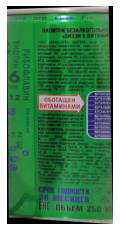

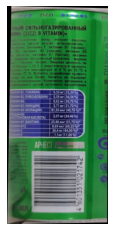

____________________constructing panorama____________________


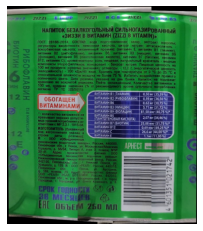

In [48]:
plt.rcParams['figure.figsize'] = (15.0, 4.0)
transformed_imgs, max_x, min_x, max_y, min_y = consequtive_stitching(ipaths, homographies)
final_panorama = get_panorama(transformed_imgs, max_x, min_x, max_y, min_y)

In [49]:
# for ipath in ipaths:
#     os.remove(ipath)

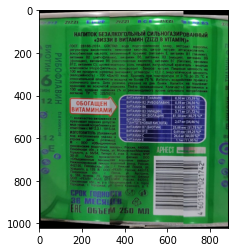

In [50]:
plt.imshow(final_panorama)

In [51]:
from matplotlib.image import imsave
imsave('data_label/final_panorama.jpg', final_panorama)

In [ ]:
# !pip install fuzzywuzzy
# !pip install --user easyocr

In [59]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import cv2
import easyocr
import re

In [60]:
# че делаем:
# считываем

# иногда OCR модель не распознает буквы и запятые, поэтому вместо, например,
# "Water, Glycerin Palmitic Acid" 
# она выявляет 
# "Water Glycerin Palmltic Acid"
# чтобы бороться с некорректными буквами, мы используем сравнение через левенштейна,
# чтобы бороться с нераспознанными делимитерами типа запятых, мы втупую извлекаем все окна всех возможных длин из строк
# т. е.  
# "Water Glycerin Palmltic Acid" -> 
# ['Water', 'Glycerin', 'Palmltic', 'Acid',
# 'Water Glycerin', 'Glycerin Palmltic', 'Palmltic Acid',
# 'Water Glycerin Glycerin Palmltic', 'Glycerin Palmltic Acid',
# 'Water Glycerin Palmltic Acid']
# для каждой такой комбинации слов ищем соответствие в списке из возможных ингредиентов

# функция get_consequtive_comb как раз ищет все такие последовательные комбинации
def get_consequtive_comb(string_from_OCR):
    # Filter additional spaces
    string_from_OCR = ' '.join(filter(None, string_from_OCR.strip().split(' ')))
    
    # case when commas are not parsed correctly
    potential_forms = string_from_OCR.split(' ')

    n = len(potential_forms)
    res = []
    for k in range(1, n+1):
        start = 0
        end = k   
        while end <= n:
            res.append(" ".join(potential_forms[start:end]))
            start+=1
            end +=1
                    
    return res

In [61]:
# функция для определения похожести слов
def levenstein(string_from_OCR: str, string_from_db: str) -> int:
    # Force lowercase characters to make levenshtein more accurate
    string_from_OCR, string_from_db = string_from_OCR.lower(), string_from_db.lower()

    # Filter all characters that are not present in substances' names
    regex_to_filter_noise_from_string = re.compile('[^a-zA-Zа-яА-Я0-9\'-/ ]')
    string_from_OCR = regex_to_filter_noise_from_string.sub("", string_from_OCR)
    string_from_db = regex_to_filter_noise_from_string.sub("", string_from_db)

    # Return Levenshtein ratio of input strings
    return fuzz.ratio(string_from_OCR, string_from_db)

# функция для поиска наиболее похожих ингредиентов (при этом схожесть должна быть больше некоторого порога)
def matcher(string_from_OCR: str, dataset: list) -> list:
    # variable for the maximum levenstein similarity
    max_ratio = 80
    substance_with_max_ratio = ''
    
    # случай, когда не распознали делимитер и в string_from_OCR оказалось несколько склеенных string_from_OCR
    potential_forms = string_from_OCR.split(' ') # достаем все слова  
    comb_from_string = get_consequtive_comb(string_from_OCR) # последовательные комбинации слов
    
    res = []
    for sub_string in comb_from_string:
        max_ratio = 80
        substance_with_max_ratio = ''
        # looking for max similarity between words
        for substance in dataset:
            current_ratio = levenstein(sub_string, substance)
#             print(sub_string, substance, current_ratio)
            if current_ratio > max_ratio:
                max_ratio =current_ratio
                substance_with_max_ratio = substance
                # break the loop for 100% match
            if max_ratio == 100:
#                 print(sub_string, substance, current_ratio)
                break
        res.append(substance_with_max_ratio)

    return res

# на вход подаем список из текстов (что распознали на картинке),
# а также список из всех возможных ингредиентов, для которых и ищем соответствие на упаковке,
# на выходе имеем наиболее подходящие ингредиенты
def get_ingridients(texts_from_OCR: list, dataset: list) -> list:
    matches = []
    for potential_ingridient in texts_from_OCR:
        ingridient_list = matcher(potential_ingridient, dataset)
        for ingridient in ingridient_list: 
            if ingridient != '' and ingridient not in matches:
                matches.append(ingridient)
    return matches

# на входе сырой результат OCR модели, на выходе список из потенциальных ингредиентов (сплитим результат по ;,:.) 
def get_texts_from_OCR(ocr_result: list) -> list:
    texts_res = ""
    for _, text, __ in ocr_result: # _ = bounding box, text = text and __ = confident level
        texts_res += " "
        texts_res += text
    print(texts_res) 
    print('-------------------')
    final_text_split = re.split(':|;|,|\.', texts_res)
    
    return final_text_split
    
    
def get_all(reader, img, dataset):
    ocr_result = reader.readtext(img)
    texts_from_OCR = get_texts_from_OCR(ocr_result)
    ingridient = get_ingridients(texts_from_OCR, dataset)
    return ingridient

In [62]:
reader = easyocr.Reader(['ru'])
img = cv2.imread('data_label/final_panorama.jpg')
# img = cv2.imread('photo_2023-12-20_22-54-37.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [63]:
# dataset= ['water', 'glycerin palmitic acid', 'myristic acid', 'lauric acid', 'fake acid', 'fake inrgidient', 
#           'another fake', 'сахар', 'вода питьевая', 'витамин B5', 'молоко', 'конценрат кубники']

In [64]:
data = {
    'compound name' : ['вода подготовленная', 'вода газированная', 'очищенная вода', 'сахар', 'сахароза', 'глюкоза', 'лимонная кислота', 'гидрокарбонат натрия', 'карбонат магния', 'таурин', 'кофеин', 'ниацин', 'пантеноновая кислота', 'B6', 'B12', 'сахарный колер простой', 'рибофлавин', 'экстракт ацеролы',  'цитрат натрия' , 'аскорбиновая кислота', 'витамин E', 'витамин B1', 'витамин B2', 'витамин B6', 'витамин B9',  'витамин B5', 'витамин B7',  'биотин', 'витамин B12', 'витамин С', 'соль пищевая', 'бензоат натрия', 'сухое обезжиренное молоко', 'концентрат клубники', 'тиамин', 'фолацин', 'натуральные красители – медные комплексы хлорофиллинов', 'сахарный колер IV', 'регулятор кислотности ортофософрная кислота', 'ортофосфорная кислота', 'натуральный ароматизатор хинин', 'хинин', 'сорбат калия', 'цитрат натрия 3-замещенный', 'орто-фосфат калия 1-замещенный', 'L-карнитин', 'гуммиарабик', 'эфиры глицерина и смоляных кислот', 'инозит', 'экстракт семян гуараны', 'экстракт корня женшеня'],
    'safety rank' : ['S','S','S','S','S','S','S','S','SS', 'S', 'SS','SS','SS','S', 'MD', 'S', 'SS','S','MD','SS','S', 'SS','S','SS', 'SS','SS','S','S','MD','SS','S','SS','S','S','S','SS','S','SS','D','D','D', 'D', 'S','SS','SS', 'SS','S','S','S','SS','MD']
}
dataset = data['compound name']
    

In [65]:
get_all(reader, img, dataset)

 5 ; ? 71771 771 7771 НАПИТОК БЕЗАЛКОГОЛЬНЫЙ СИЛЬНОГАЗИРОВАННЫЙ "ЗИЗЗи В ВИТАМИН (7177/ В УПАМК)? ТОст   28188-2014. СОСТАВ: поПа попготовпвннан; сахар; экстракт   япоропы; регпор ислотности пимоннап киспога цитраг натрин; антнокиспитапь аскорбиношая _иглощ  втаминный премико (витамин Е витамин В1 (тамин) 8 пипмин Б2 (рирофпянин) витамнн В6 пмин В3   (ниацин) дитамин 69 (Фопаин) 1н 85  (пантотеновая киспова) виптамин В7 биотин) дитамин 612 Б С); ароматизаторы; соль пишеван; натуральный краситоль мопнНа домплоксы _порофиллчнов консарвант бензоат натрия Пишанан памность 100 мл пропукта (срепнив угловопы 2 0 энергетичаскан ценностъ (алорот) 200 кПж/45 ккал: при температуро 010 С Ло 25 'С 6 = ООПОс нОг СВ свепа ШЮст рвозивха не болва 75 Дн8 Избекать вгзпекстная порлвгт храман нскриой упаковке Пеизана Олленным Копичество нмаминон 4 4 10 1и₽ анчвнин рекомвнпуамого уровнп Суточнога потребленил гоас ' яС 02222011) ВИТАМИНВ1 ПИАМИН) 050 г[35,39%/ 1 2 ОБОГАЩЕН ВИТАМИН В2 (РИБОФЛАВИН) 059 мг [36,

['витамин E',
 'сахар',
 'цитрат натрия',
 'ниацин',
 'биотин',
 'витамин B1',
 'витамин B7',
 'витамин B12',
 'соль пищевая',
 'бензоат натрия',
 'рибофлавин',
 'витамин B2',
 'тиамин',
 'фолацин',
 'витамин B9',
 'витамин С']

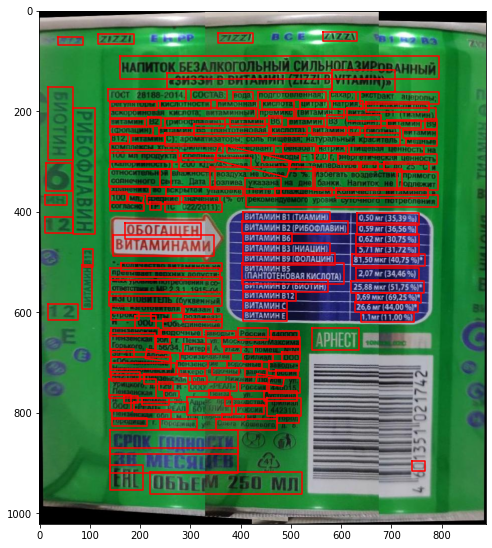

In [66]:
# reading the image

# run OCR
results = reader.readtext(img)
plt.figure(figsize=(8,10))
plt.imshow(img,cmap = 'gray')

for res in results:
    # bbox coordinates of the detected text
    xy = res[0]
    xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
    # text results and confidence of detection
    det, conf = res[1], res[2]
    # show time :)
    
    
    plt.plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
#     plt.text(xy1[0], xy1[1], f'{det} [{round(conf, 2)}]')